Project Requirements

1 - Identify and load a network dataset that has some categorical information available for each node.

2- For each of the nodes in the dataset, calculate degree centrality and eigenvector centrality.

3 - Compare your centrality measures across your categorical groups.

For example, using the dataset from a study of romantic relationships among high school students in Columbus, Ohio [http://researchnews.osu.edu/archive/chains.htm], you might want to determine if there are any differences in your calculated centrality measures between the two sexes.  You might use a t-test or another statistical measure to support your findings.

You may work in a small group.  Your project should be delivered in an IPython Notebook, and posted in GitHub.  Your project is due end of day Monday October 3rd.  You'll also be asked to briefly present your project in our Meet-up on Tuesday, October 11th. 

Overview:
This project will use one month of Citi Bike data from June 2016, the most recent month of data available at this time. The data set includes the following fields:

    Trip Duration (seconds)
    Start Time and Date
    Stop Time and Date
    Start Station Name
    End Station Name
    Station ID
    Station Lat/Long
    Bike ID
    User Type (Customer = 24-hour pass or 7-day pass user; Subscriber = Annual Member)
    Gender (Zero=unknown; 1=male; 2=female)
    Year of Birth

This project will focus on the Start Station and End Station as nodes, and User Type as a categorical variable.  Edges in the network will be bike trips between stations, which in this case means start station to end station, and will be focused only on which station the bike was picked up and returned, not where the bike may have been taken in between. Some trips begin and end at the same station because people may pick up a bike, run an errand and then return it to the same station.  

The goal of this analysis is to determine which stations are most integral to the network based on various centrality measures.  In addition, it will look for subgraphs, triads, cliques and clusters, to analyze the subgraph structure of the citi-bike network. It will also compare these measures for customers vs subscribers vs. the network as a whole.

This analysis could help in planning where more bikes might be needed or identify stations that are critical to the network but might not be obvious via eigenvector centrality.


About Citi Bike:
https://www.citibikenyc.com/about
    Citi Bike is New York City’s bike share system, and the largest in the nation. Citi Bike launched in May 2013 and has become an essential part of our transportation network. 
    Citi Bike, like other bike share systems, consists of a fleet of specially designed, sturdy and durable bikes that are locked into a network of docking stations throughout the city. The bikes can be unlocked from one station and returned to any other station in the system, making them ideal for one-way trips. People use bike share to commute to work or school, run errands, get to appointments or social engagements, and more.
    Citi Bike is available for use 24 hours/day, 7 days/week, 365 days/year, and riders have access to thousands of bikes at hundreds of stations across Manhattan, Brooklyn, Queens and Jersey City.
    

About Citi Bike Data:
https://www.citibikenyc.com/system-data
    Where do Citi Bikers ride? When do they ride? How far do they go? Which stations are most popular? What days of the week are most rides taken on? We've heard all of these questions and more from you, and we're happy to provide the data to help you discover the answers to these questions and more. We invite developers, engineers, statisticians, artists, academics and other interested members of the public to use the data we provide for analysis, development, visualization and whatever else moves you.

In [1]:
#Open the data file using the CSV library
#used for generating the graph from the original csv data
'''
import csv 
'''

'\nimport csv \n'

In [2]:
#Get the headers
#used for generating the graph from the original csv data
'''
with open('201606-citibike-tripdata.csv', 'rb') as f:
    reader = csv.reader(f)
    header = reader.next()
'''

"\nwith open('201606-citibike-tripdata.csv', 'rb') as f:\n    reader = csv.reader(f)\n    header = reader.next()\n"

In [3]:
#view headers
#used for generating the graph from the original data

'''
header
'''

#start station name is 5th in the list
#end station name is 9th in the list
#usertype is 13th in the list

'\nheader\n'

In [4]:
#used for generating the graph from the original csv
'''
[header[4],header[8],header[12]]
'''

'\n[header[4],header[8],header[12]]\n'

In [5]:
import networkx as net

In [6]:
#set up a networkx graph, and add the nodes and categorical variable from the file

#Code used to build the initial graph
'''
g=net.Graph()

with open('201606-citibike-tripdata.csv', 'rb') as f:
    reader = csv.reader(f)
    reader.next()  #skip header row
    for line in reader:
        node1 = line[4]
        #Check for missing zipcodes - change missing zipcodes to "Not Reported"
        node2 = line[8]
        g.add_edge(node1,node2,userType=line[12])
'''

'\ng=net.Graph()\n\nwith open(\'201606-citibike-tripdata.csv\', \'rb\') as f:\n    reader = csv.reader(f)\n    reader.next()  #skip header row\n    for line in reader:\n        node1 = line[4]\n        #Check for missing zipcodes - change missing zipcodes to "Not Reported"\n        node2 = line[8]\n        g.add_edge(node1,node2,userType=line[12])\n'

In [7]:
import matplotlib.pyplot as plot

In [8]:
matplotlib inline

In [9]:
#write the graph to a file so it doesn't have to be re-created every time
#net.write_pajek(g, "citibike.net")
g=net.read_pajek("citibike.net")

In [10]:
#Number of nodes in the network
len(g.nodes())

489

In [11]:
#Number of edges in the network
len(g.edges())

67956

In [12]:
#test an edge
g.edges()[100]

(u'Broadway & W 37 St', u'E 16 St & Irving Pl')

In [13]:
#test for status
g['Broadway & W 37 St']['E 25 St & 2 Ave']

{0: {u'userType': u'Subscriber', 'weight': 1.0}}

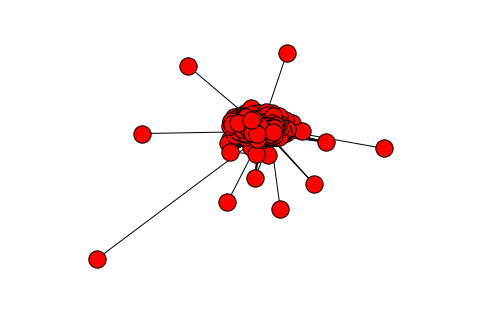

In [14]:
#View the network graph
net.draw(g)

Degree Centrality:
Degree is the number of connections that a node has. In this network it is the number of non-directional trip patterns that the station is part of.
If a station has high degree centrality relative to other stations, this means that there are more trip patterns that begin and end at this station than at other stations.

In [15]:
#compute the degree of every node in the network
deg = net.degree(g)

In [16]:
#What is the minimum degree of any node
min(deg.values())

1

In [17]:
#What is the maximum degree of any node
max(deg.values())

426

In [18]:
#function to return a sorted degree list 
def sorted_map(map):
    ms = sorted(map.iteritems(), key = lambda(k,v): (-v,k))
    return ms

In [19]:
ds = sorted_map(deg)

The stations with the highest degree centrality are:

In [20]:
#top 10 stations
ds[0:10]

[(u'Lafayette St & Jersey St', 426),
 (u'Stanton St & Chrystie St', 426),
 (u'E 17 St & Broadway', 424),
 (u'Cleveland Pl & Spring St', 422),
 (u'Mott St & Prince St', 422),
 (u'Lafayette St & E 8 St', 419),
 (u'Suffolk St & Stanton St', 417),
 (u'Allen St & Rivington St', 414),
 (u'Allen St & Stanton St', 413),
 (u'S 5 Pl & S 4 St', 413)]

The top stations are those that appear most often in trip patterns.
A histogram of the degree of each station resembles a left skewed normal distribution, so there is range of popularity of stations.

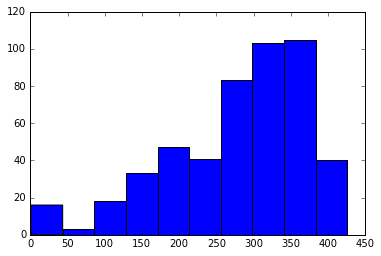

In [21]:
h=plot.hist(deg.values(),10)
#display a histogram of nodes in 10 bins

Closeness centrality:
Connecting bike trips from one side of the network to the other.
Closeness describes the role of the station in the trip network.

In this case we aren't using the geographic distance, but rather how "far away" is one station from another w.r.t customer trips.

A station with higher closeness is better connected to other stations based on customer trips and is an important part of the network.

In [22]:
#Find the best connected stations with respect to trip patterns
#distance/closeness: closeness centrality
c = net.closeness_centrality(g)

In [23]:
cs = sorted_map(c)

In [24]:
#top 10 closeness centrality
cs[:10]

[(u'Lafayette St & Jersey St', 0.8840579710144928),
 (u'Stanton St & Chrystie St', 0.8840579710144928),
 (u'E 17 St & Broadway', 0.8808664259927798),
 (u'Mott St & Prince St', 0.8776978417266187),
 (u'Cleveland Pl & Spring St', 0.8761220825852782),
 (u'Lafayette St & E 8 St', 0.8729874776386404),
 (u'Suffolk St & Stanton St', 0.8698752228163993),
 (u'Allen St & Rivington St', 0.8652482269503546),
 (u'Allen St & Stanton St', 0.863716814159292),
 (u'Broadway & E 22 St', 0.8621908127208481)]

The list is similar to the degree centrality list, but there are some differences. The list represents the most connected stations in the network, and therefore stations that are critical for the network.

The histogram resembles a somewhat left skewed normal distribution. 

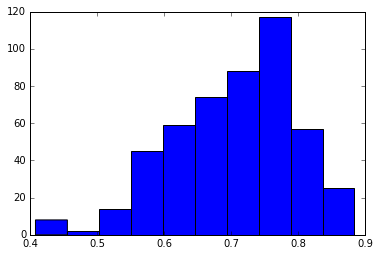

In [25]:
#plot the distribution
h=plot.hist(c.values(),10)

Betweenness centrality 
How central is the station.  Stations that have high betweeness centrality act like a hub that trips flow into and out of.
Depending on the directional flow, these stations may be more likely to have bikes if the direction is in, or less likely if the directional flow is out.

In [26]:
#Central/Hub stations
#Betweenness centrality
b=net.betweenness_centrality(g)

In [27]:
bs = sorted_map(b)

In [28]:
#top 10 stations for Betweenness Centrality
bs[:10]

[(u'12 Ave & W 40 St', 0.0074741360055767736),
 (u'Grand St & Havemeyer St', 0.005949438357952093),
 (u'West St & Chambers St', 0.005897279171799308),
 (u'Peck Slip & Front St', 0.0054928155533733375),
 (u'West Thames St', 0.00501915407997822),
 (u'Clinton St & Joralemon St', 0.004974372382411196),
 (u'Central Park West & W 72 St', 0.0044651996542609115),
 (u'Forsyth St & Broome St', 0.0039492266018541),
 (u'S 5 Pl & S 4 St', 0.003244861287516204),
 (u'York St & Jay St', 0.0028901359053334487)]

This list is very different from the degree and closeness centrality list above. Betweenness is very low across the board.  Since this is a bike network and not a transit network it's not surprising that there is no real hub as people don't transfer between bike stations, they take the bike go where they want and drop the bike off at another station.

The following histogram, shows that most stations have betweenness centrality of 0, while the highest betweeness centrality is still very low.

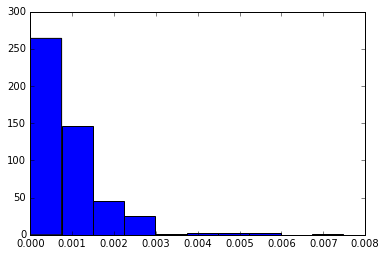

In [29]:
#plot the distribution
h=plot.hist(b.values(),10)

In [30]:
#Eigenvector Centrality
#finding the grey cardinals
#have to change graph format to use eigenvector function
e = net.Graph(g)

In [31]:
eig = net.eigenvector_centrality(e)

In [32]:
eigs = sorted_map(eig)

In [33]:
eigs[:10]

[(u'Lafayette St & Jersey St', 0.06329390917430093),
 (u'E 17 St & Broadway', 0.06320786978462813),
 (u'Lafayette St & E 8 St', 0.06271394847369095),
 (u'Stanton St & Chrystie St', 0.06262788942208038),
 (u'Mott St & Prince St', 0.06251587007798083),
 (u'Cleveland Pl & Spring St', 0.06227498839091143),
 (u'Broadway & E 22 St', 0.06223604933220615),
 (u'Broadway & E 14 St', 0.06213295813776062),
 (u'Great Jones St', 0.06186303672911103),
 (u'St Marks Pl & 2 Ave', 0.06170096135659063)]

There is some overlap between this list and the degree centrality list, but there are stations that appear in this list that do not appear in the degree centrality list, and vice versa.

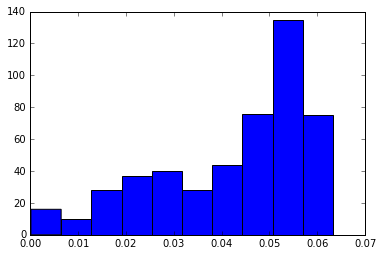

In [34]:
h=plot.hist(eig.values(),10)

Categorical Group Comparison
Looking at just degree centrality and eigenvector centrality compare these measures for the different values of the categorical variable.

The categorical variable that will be used is user type. User type has two options: Customer and Subscriber.

We'll split the edges into two graphs, all edges with attribute userType = 'Customer' (gS) and another where all edges have attribute userType = 'Subscriber' (gC)

In [35]:
#source: http://stackoverflow.com/questions/15644684/best-practices-for-querying-graphs-by-edge-and-node-attributes-in-networkx
edgeC =((u,v) for u,v,d in g.edges_iter(data=True) if d['userType']=='Customer')
edgeS =((u,v) for u,v,d in g.edges_iter(data=True) if d['userType']=='Subscriber')

In [36]:
gC = net.Graph()
gS = net.Graph()

In [37]:
gC.add_edges_from(edgeS)
gS.add_edges_from(edgeC)

In [38]:
len(gC.edges())

62540

In [39]:
len(gS.edges())

5416

In [40]:
#original graph
len(g.edges())

67956

There are far more customer edges than subscriber edges

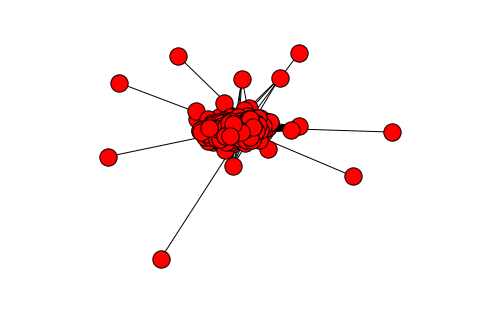

In [41]:
net.draw(gC)

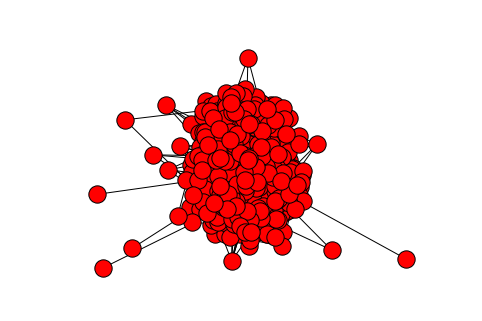

In [42]:
net.draw(gS)

In [43]:
#Degree Centrality
degC = net.degree(gC)
degS = net.degree(gS)

In [44]:
dsC = sorted_map(degC)
dsS = sorted_map(degS)

In [45]:
dsC[0:10]

[(u'E 17 St & Broadway', 402),
 (u'Broadway & E 22 St', 400),
 (u'Lafayette St & Jersey St', 399),
 (u'Cleveland Pl & Spring St', 398),
 (u'Stanton St & Chrystie St', 396),
 (u'Lafayette St & E 8 St', 393),
 (u'Suffolk St & Stanton St', 393),
 (u'Mott St & Prince St', 392),
 (u'E 3 St & 1 Ave', 385),
 (u'Allen St & Rivington St', 384)]

In [46]:
dsS[0:10]

[(u'Old Fulton St', 104),
 (u'Centre St & Chambers St', 86),
 (u'Cadman Plaza E & Tillary St', 72),
 (u'Central Park S & 6 Ave', 69),
 (u'5 Ave & E 78 St', 66),
 (u'Cadman Plaza E & Red Cross Pl', 66),
 (u'Grand Army Plaza & Central Park S', 65),
 (u'Kent Ave & N 7 St', 61),
 (u'Pier 40 - Hudson River Park', 58),
 (u'W 14 St & The High Line', 58)]

In [47]:
#The top 10 list for Customers vs Subscribers is very different

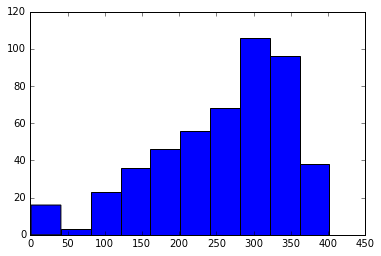

In [48]:
(nC, bins, patches)=plot.hist(degC.values(),10)

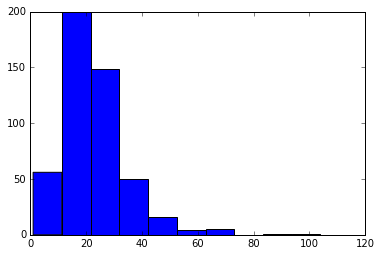

In [49]:
(nS, bins, patches)=plot.hist(degS.values(),10)

Testing is required to determine if these distributions are the same:

To use a t-test both distributions must be approximately normal.

Generate a QQ plot for each distribution to see if the distribution is approximately normal
http://stackoverflow.com/questions/13865596/quantile-quantile-plot-using-scipy

The independent t-test also assumes the variances of the two groups are equal in the population.  An F-test is required to check the variances.

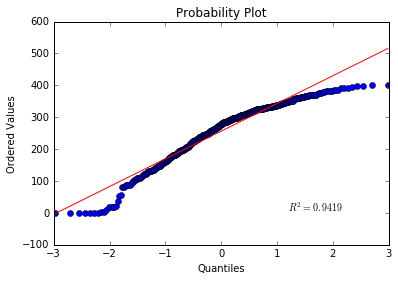

In [50]:
import numpy as np 
import pylab 
import scipy.stats as stats

stats.probplot(degC.values(), dist="norm", plot=pylab)
pylab.show()

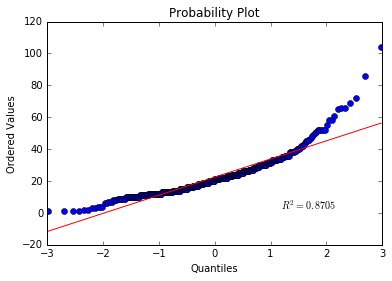

In [51]:
stats.probplot(degS.values(), dist="norm", plot=pylab)
pylab.show()

The distributions deviate at the tails, but we'll assume they are close enough to normal to use a t-test. 

The next step is to check the variances with an F-test.

In [52]:
F = np.var(degC.values())/np.var(degS.values())

In [53]:
F

53.927261333491714

In [54]:
#Do an F-test with alpha = 0.05
#get degrees of freedom
dfC = len(degC.values()) - 1
dfS = len(degS.values()) - 1

In [55]:
p_value = stats.f.cdf(F, dfC, dfS)
p_value

0.99999999999999989

We do not reject the null hypothesis that the variances are different.

In [56]:
stats.ttest_ind(degC.values(), degS.values())

Ttest_indResult(statistic=57.102937950707847, pvalue=3.4872814492846647e-312)

There is no statistically significant difference between the Customer and Subscriber distributions of degree, even though the top ten list by degree is different.

Compute eigenvector centrality for customers and subscribers

In [57]:
eC = net.Graph(gC)
eS = net.Graph(gS)

In [58]:
eigC = net.eigenvector_centrality(eC)
eigS = net.eigenvector_centrality(eS)

In [59]:
eigCs = sorted_map(eigC)
eigSs = sorted_map(eigS)

In [60]:
eigCs[:10]

[(u'Broadway & E 22 St', 0.06519763643940488),
 (u'E 17 St & Broadway', 0.06423052112698686),
 (u'Lafayette St & E 8 St', 0.06383075736364696),
 (u'Lafayette St & Jersey St', 0.06342385582348613),
 (u'E 3 St & 1 Ave', 0.06336722201058506),
 (u'Cleveland Pl & Spring St', 0.0633094849126868),
 (u'W 21 St & 6 Ave', 0.06327133737219524),
 (u'Pershing Square North', 0.0631689468948299),
 (u'Stanton St & Chrystie St', 0.06303957372120764),
 (u'Great Jones St', 0.06277142453906191)]

In [61]:
eigSs[:10]

[(u'Old Fulton St', 0.1936333159695337),
 (u'Centre St & Chambers St', 0.16072611267728404),
 (u'Cadman Plaza E & Tillary St', 0.14478010129855576),
 (u'Cadman Plaza E & Red Cross Pl', 0.1316321396009717),
 (u'Central Park S & 6 Ave', 0.12188488180160598),
 (u'Peck Slip & Front St', 0.12104219122762537),
 (u'Pier 40 - Hudson River Park', 0.11357752848066939),
 (u'W 14 St & The High Line', 0.11250785423506364),
 (u'5 Ave & E 78 St', 0.10942910653937857),
 (u'Centre St & Worth St', 0.1078760919618757)]

The top 10 list is very different for Customers and Subscribers

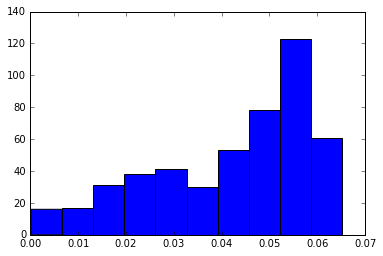

In [62]:
h=plot.hist(eigC.values(),10)

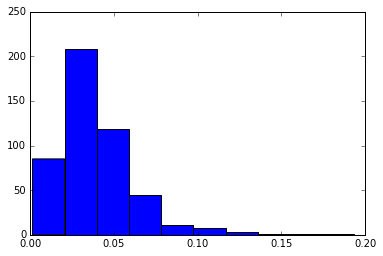

In [63]:
h=plot.hist(eigS.values(),10)

Check for normality and variance

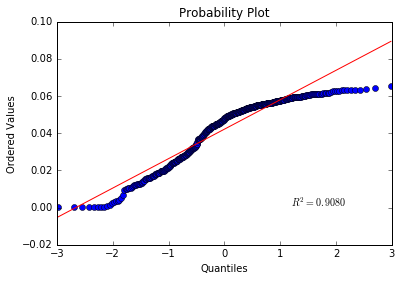

In [64]:
stats.probplot(eigC.values(), dist="norm", plot=pylab)
pylab.show()

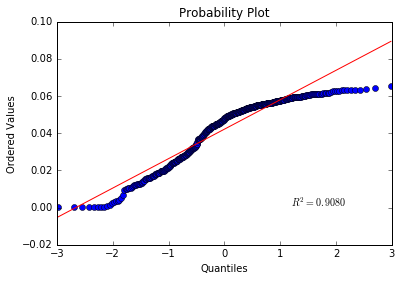

In [65]:
stats.probplot(eigC.values(), dist="norm", plot=pylab)
pylab.show()

The curves deviate a lot from normal, based on the QQ plot, so we will use a KS test instead to test if the two samples are likely to have come from the same distribution.

In [66]:
stats.ks_2samp(eigC.values(), eigS.values())

Ks_2sampResult(statistic=0.26205700292497114, pvalue=3.9773862956371918e-15)

p-value is greater than 0.05 so there is no statistically significant difference between the distributions of Customer and Subscriber eigenvalue centrality, even though the top ten eigenvector centrality lists appear to be different.